In [1]:
import pandas as pd
import numpy as numpy


In [2]:
df = pd.read_csv('spam.csv')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [3]:
df.shape

(5572, 5)

In [4]:
#1. Data Cleaning
#2.EDA
#3.Text Preprocessing
#4.Model Building
#5.Evaluation
#6.Improvment
#7.Website
#8. Deploy

# Data Cleaning

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [6]:
df.columns

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

In [7]:
# Low value in Unnamed 
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [8]:
df.sample(5)

,v1,v2
4654,ham,Our Prasanth ettans mother passed away last ni...
3686,ham,Great! I shoot big loads so get ready!
3587,ham,If you were/are free i can give. Otherwise nal...
1199,ham,NEFT Transaction with reference number &lt;#&...
2842,ham,"Tunji, how's the queen? how are you doing. Thi..."


In [9]:
# Renaming columns
df.rename(columns={'v1':'targets','v2':'text'},inplace=True)


In [10]:
df.sample(5)

,targets,text
2119,ham,I hope you know I'm still mad at you.
1582,ham,"Yep, at derek's house now, see you Sunday &lt;3"
4146,ham,Pls help me tell sura that i'm expecting a bat...
4333,ham,Boo what time u get out? U were supposed to ta...
992,ham,Up to Ì_... ÌÏ wan come then come lor... But i...


In [11]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [12]:
df['targets']=encoder.fit_transform(df['targets'])


In [13]:
df.head()

,targets,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [14]:
# Checking Missing Values
df.isnull().sum()

targets    0
text       0
dtype: int64

In [15]:
# Checking a duplicates values

df.duplicated().sum()

403

In [16]:
# Removing the duplicates values
df = df.drop_duplicates(keep='first')

In [17]:
df.duplicated().sum()

0

In [18]:
df.shape

(5169, 2)

# 2. Exploratory Data Analysis(EDA)

In [19]:
df.head()

,targets,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [20]:
df['targets'].value_counts()

0    4516
1     653
Name: targets, dtype: int64

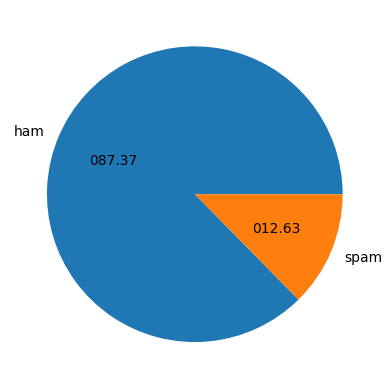

In [21]:
import matplotlib.pyplot as plt
plt.pie(df['targets'].value_counts(),labels=['ham','spam'],autopct="0%.2f")
plt.show()

**Data is Imbalance** - ham is high and spam is less

In [22]:
import nltk

In [23]:
# Dependency libary requirement to call 
nltk.download('punkt')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\prabh\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [24]:
# Num of characters
df['num_characters']=df['text'].apply(len)

In [25]:
df.head()

,targets,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [26]:
# fecting the Num of words
df['num_words']= df['text'].apply(lambda x:len(nltk.word_tokenize(x)))


In [27]:
df.head()

,targets,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [28]:
# Num of sentences
df['num_sentences']= df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [29]:
df.head()

,targets,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [30]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [31]:
# Ham 
df[df['targets']== 0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [32]:
#Spam
df[df['targets']== 1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


We can clearly understand the high characters,high word,high senctences in spam.

In [33]:
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

<Axes: xlabel='num_characters', ylabel='Count'>

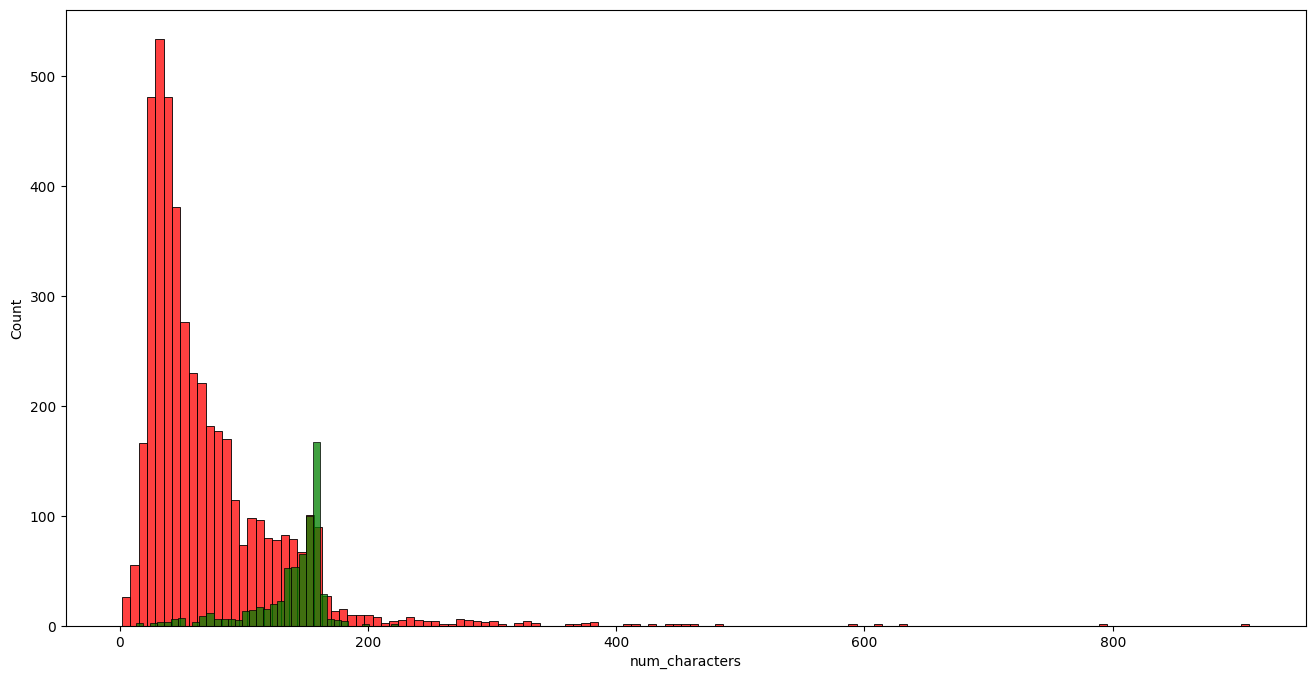

In [34]:
plt.figure(figsize=(16,8))
sns.histplot(df[df['targets']==0]['num_characters'],color='red')
sns.histplot(df[df['targets']==1]['num_characters'],color ='green')


We can see the on an average the characters are seen in ham and the spam is made of high characters and ham is made of average characters.

<Axes: xlabel='num_words', ylabel='Count'>

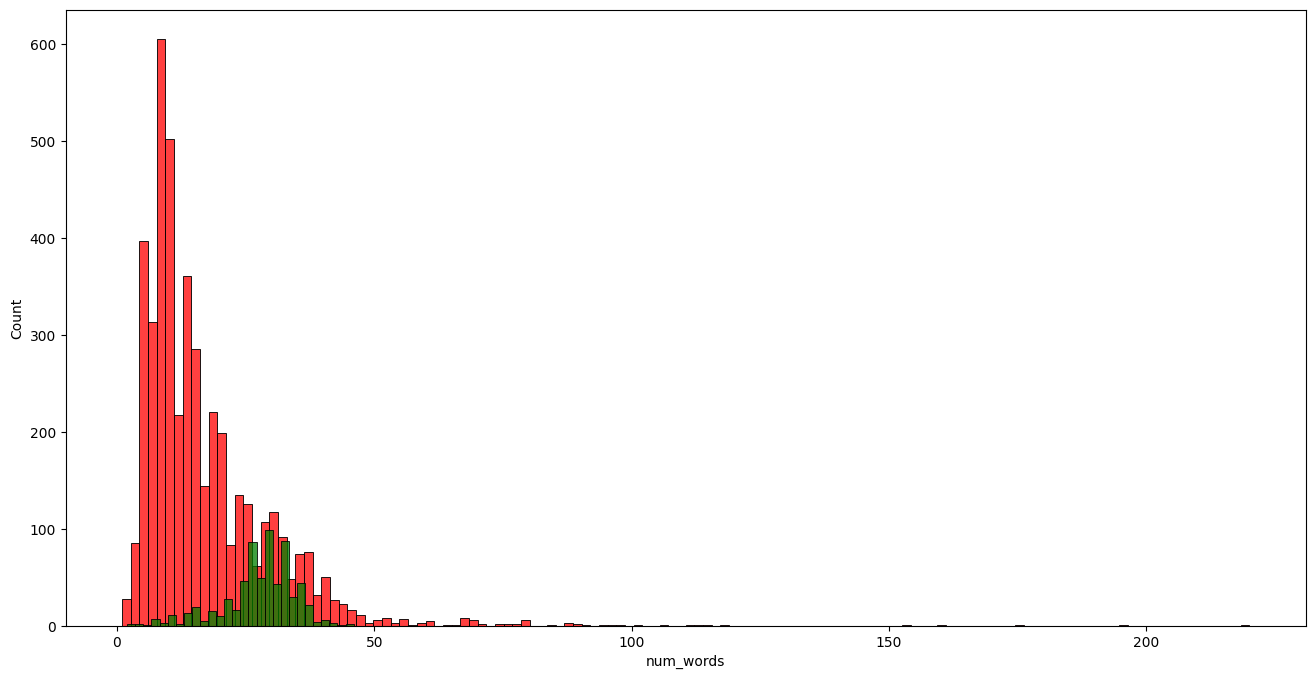

In [35]:
plt.figure(figsize=(16,8))
sns.histplot(df[df['targets']==0]['num_words'],color='red')
sns.histplot(df[df['targets']==1]['num_words'],color='green')

Spam is made of high word and ham is made of average word similar to characters

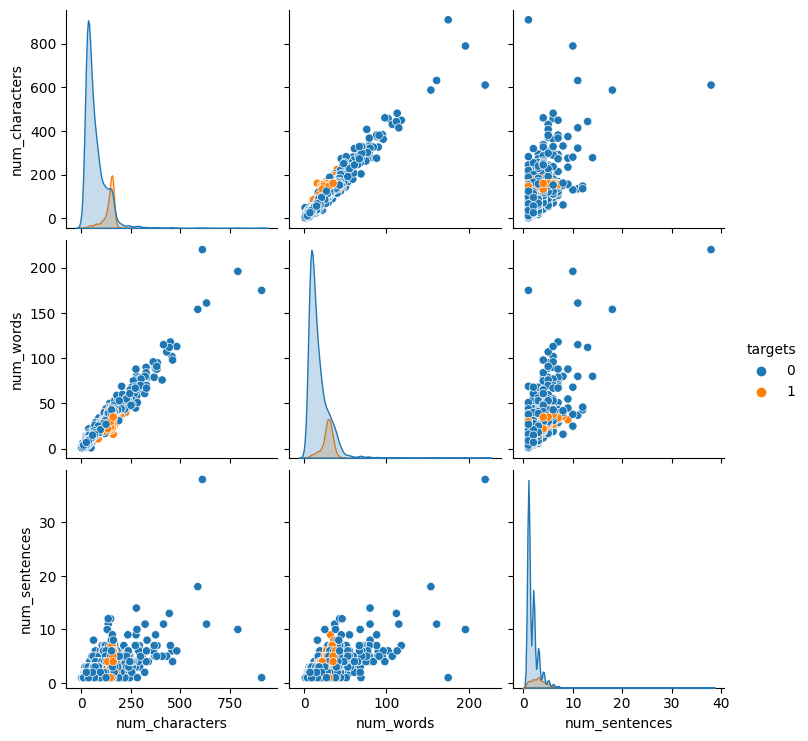

In [36]:
sns.pairplot(df,hue='targets')

<Axes: >

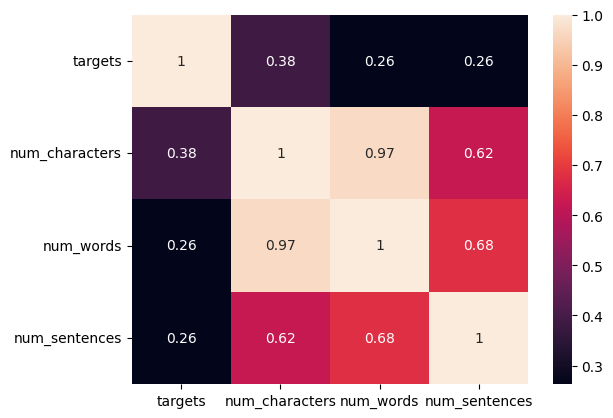

In [37]:
sns.heatmap(df.corr(),annot=True)

We understand the num_characters is reaching to target and num_sentences with characters

# 3.Data Preprocessing

* Lower Case -text to lower case.

* Tokenization - punctuation marks, and numbers

* Removing -special characters-Special characters, such as punctuation marks and symbols

* Removing stop words and punctuation - such as "the", "is", and "of". Punctuation marks, such as commas, periods, and question marks, can also be confusing for NLP models

* Stemming- This is done by removing affixes, such as prefixes and suffixes. For example, the words "running" and "ran" would both be stemmed to the root word "run".

In [38]:
import string

In [39]:
from nltk.corpus import stopwords


In [40]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [41]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
    
            
    return " ".join(y)

In [42]:
transform_text('I sent you  &lt;#&gt;  bucks')

'sent lt gt buck'

In [43]:
df['text'][200]

'I sent you  &lt;#&gt;  bucks'

In [44]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('loving')

'love'

In [45]:
df['transformed_text']= df['text'].apply(transform_text)

In [46]:
df.head()

,targets,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [47]:
#highlight the most frequently used words in a piece of text.
#Word clouds can be used to analyze text data from a variety of sources, 
#such as social media posts, news articles, and scientific papers.
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [48]:
spam_wc = wc.generate(df[df['targets']==1]['transformed_text'].str.cat(sep=""))

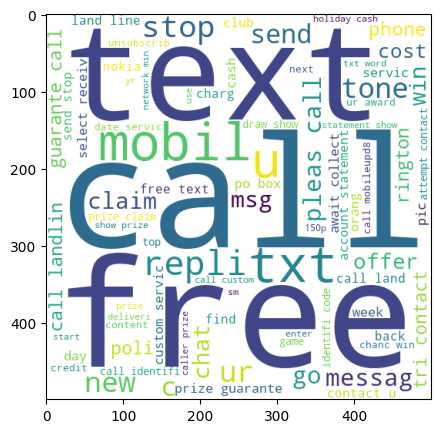

In [49]:
plt.figure(figsize=(16,5))
plt.imshow(spam_wc)

We can see in the spam the spam word is sexi,prize claim,call custom many other word more related to spam 

In [50]:
ham_wc = wc.generate(df[df['targets']==1]['transformed_text'].str.cat(sep=""))

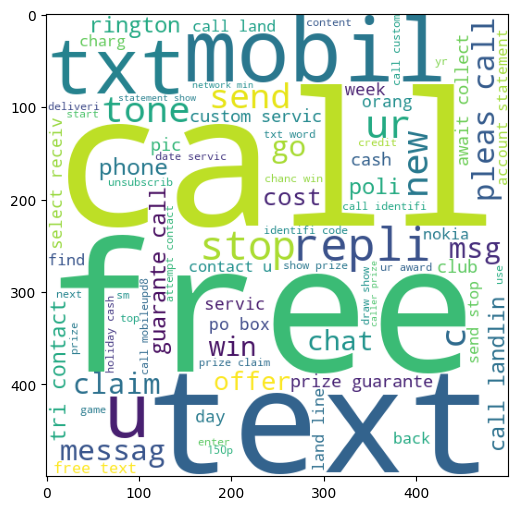

In [51]:
plt.figure(figsize=(16,6))
plt.imshow(ham_wc)

In ham we can see the average word related to spam

In [52]:
df.head()


,targets,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [53]:
for i in df['targets']:
    print(i)

0
0
1
0
0
1
0
0
1
1
0
1
1
0
0
1
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
1
0
1
0
0
0
0
0
0
0
0
1
0
1
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
1
0
0
1
1
0
1
0
0
0
0
0
0
0
0
0
0
1
1
0
0
0
1
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
1
1
0
0
0
1
1
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
1
0
0
0
0
0
0
0
1
0
0
0
0
1
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
1
0
0
0
0
1
0
0
0
1
0
1
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
1
0
0
0
1
0
0
1
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
1
0
1
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
1
1
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
1
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
1
0
1
0
1
0
1
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
1
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0


In [54]:
spam_corpus =[]
for message in df:
    
    if df[df['targets']==1]['transformed_text'].tolist():
        for word in message.split():
            spam_corpus.append(word)

In [55]:
len(spam_corpus)

6

In [56]:
# This creat a dictionary
from collections import Counter
pd.DataFrame(Counter(spam_corpus).most_common(30))


,0,1
0,targets,1
1,text,1
2,num_characters,1
3,num_words,1
4,num_sentences,1
5,transformed_text,1


In [57]:
column_name = " YourCol"
column_name = column_name.strip()

In [58]:
ham_corpus =[]
for message in df:
    
    if df[df['targets']==0]['transformed_text'].tolist():
        for word in message.split():
            ham_corpus.append(word)
    

In [59]:
ham_corpus = []
for msg in df[df['targets'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)